In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import string
from datetime import datetime
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

tokenizer = RegexpTokenizer(r'\w+') # initialize regex tokenizer
exclude = set(string.punctuation)
en_stop = set(stopwords.words('english'))# create English stop words list
lemma = WordNetLemmatizer()
p_stemmer = PorterStemmer() # Create p_stemmer of class PorterStemmer

def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for raw in doc_set:
        # clean and tokenize document string
        tokens = tokenizer.tokenize(raw.lower())
        # remove stop words and unwanted words from tokens
        stopped_tokens = [i for i in tokens if (i not in en_stop) and (i not in exclude)]
        # stem tokens
        stemmed_tokens = [lemma.lemmatize(p_stemmer.stem(i)) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts
def show_section_name(document_list):
    return [[k[0] for k in i] for i in document_list]

def show_unique_section_name(document_list):
    result = {}
    for i in document_list:
        for k in i:
            if k[0] not in result:
                result[k[0]]=1
            else:
                result[k[0]]+=1
    return {k: v for k, v in sorted(result.items(), key=lambda item: -item[1])}



def rule_for_merge(list_of_names,target_name,document_list):
    new_document_list = document_list.copy()
    list_of_names = list_of_names+[target_name]
    for n,document in enumerate(document_list):
        new_document = []
        merged_paragraph = [target_name]
        for paragraph in document:
            if paragraph[0] not in list_of_names:
                new_document.append(paragraph)
            else:
                merged_paragraph = merged_paragraph + paragraph[1:]
        if merged_paragraph!=[target_name]:
            new_document.append(merged_paragraph)
        new_document_list[n] = new_document
    return new_document_list

def rule_for_replace(dict1,document_list):
    for orignal_name in dict1.keys():
        target_name = dict1[orignal_name]
        for n,document in enumerate(document_list):
            for k,paragraph in enumerate(document):
                if paragraph[0] == orignal_name:
                    document_list[n][k][0]= target_name
    return document_list


def encode_doc_minutes(Document_list):
    return '##NewTopic##'.join(['##NewPara##'.join(i) for i in Document_list])

def decode_doc_minutes(Doc_string):
    return [i.split('##NewPara##') for i in Doc_string.split('##NewTopic##')]

def load_up_from_cleaned_minutes():
    MPC_minutes = pd.read_excel('./scripter/cleaned_dataset/MPC_minutes.xlsx')
    file_list = os.listdir("./scripter/cleaned_dataset/Minutes_MPC")
    for n,file in enumerate(file_list):
        text_file = open("./scripter/cleaned_dataset/Minutes_MPC/{}".format(file), "r").read()
        MPC_minutes.loc[MPC_minutes['title']==file[:-4],'document_string'] = text_file
    return MPC_minutes

def write_file(Document_list,folder,file):
    Word_set = encode_doc_minutes(Document_list)
    text_file = open("./scripter/cleaned_dataset/{}/{}.txt".format(folder,file[:-5]), "w")
    text_file.write(Word_set)
    text_file.close()    
    return None

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lunarhero\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lunarhero\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lunarhero\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
MPC_minutes = pd.read_hdf('data.h5', 'minutes')

In [421]:
show_section_name(MPC_minutes.N_topics)

[['Growth and inflation projections',
  'The international economy',
  'Financial markets',
  'The immediate policy decision',
  'Money, credit, demand and output',
  'Supply, costs and prices'],
 ['Growth and inflation projections',
  'Growth and inflation projections',
  'Growth and inflation projections',
  'The immediate policy decision',
  'Financial markets',
  'Growth and inflation projections',
  'Financial markets',
  'The immediate policy decision'],
 ['Financial markets',
  'The international economy',
  'Financial markets',
  'The immediate policy decision'],
 ['Growth and inflation projections',
  'Financial markets',
  'The international economy',
  'The immediate policy decision',
  'Money, credit, demand and output',
  'Supply, costs and prices'],
 ['Growth and inflation projections',
  'Financial markets',
  'The international economy',
  'The immediate policy decision',
  'Money, credit, demand and output',
  'Supply, costs and prices'],
 ['Growth and inflation projec

In [49]:
# load different interbank_rate
data_list = []
for i in ['LIBOR_1M.csv','LIBOR_1Y.csv','LIBOR_3M.csv']:
    df = pd.read_csv('./scripter/cleaned_dataset/{}'.format(i),index_col = 0)
    df.columns = [i[:-4]]
    data_list.append(df)
libor_rate = pd.concat(data_list,axis=1).dropna()
for i in range(3):
    libor_rate.iloc[:,i] = libor_rate.iloc[:,i].astype(float).round(4)
libor_rate

,LIBOR_1M,LIBOR_1Y,LIBOR_3M
1995-01-01,6.1856,7.8806,6.6358
1995-02-01,6.5868,7.8372,6.8041
1995-03-01,6.3791,7.7809,6.7255
1995-04-01,6.2669,7.6267,6.7487
1995-05-01,6.3962,7.5007,6.7779
...,...,...,...
2020-01-01,0.6624,0.8643,0.7373
2020-02-01,0.7068,0.8697,0.7462
2020-03-01,0.3520,0.7133,0.5322
2020-04-01,0.2335,0.8564,0.6442


In [95]:
data_list = []
for i in ['interbank_sonia.csv','interbank_1M.csv','interbank_1Y.csv','Euro_currency_offered_rates_USD.csv','Euro_currency_offered_rates_EUR.csv']:
    df = pd.read_csv('./scripter/cleaned_dataset/{}'.format(i),index_col = 0)
    df.index = pd.DatetimeIndex(df.index)+pd.offsets.MonthBegin(0)
    df.columns = [i[:-4]]
    data_list.append(df)
sonia_rate = data_list[0].join(data_list[1]).join(data_list[2]).join(data_list[3]).join(data_list[4])

In [94]:
merged_dataset = libor_rate.join(sonia_rate,how='outer')
items = list(merged_dataset)
merged_dataset = merged_dataset.loc[merged_dataset.index>'1997-01-01',:]
merged_dataset

,LIBOR_1M,LIBOR_1Y,LIBOR_3M,interbank_sonia,interbank_1M,interbank_1Y,Euro_currency_offered_rates_USD,Euro_currency_offered_rates_EUR
1997-02-01,6.1688,6.7328,6.2885,5.9005,6.1416,6.8202,5.5809,NaN
1997-03-01,6.1123,6.8162,6.2938,5.9850,6.0913,6.6358,5.4950,NaN
1997-04-01,6.1772,7.0250,6.4544,5.9651,6.0389,6.7147,5.6168,NaN
1997-05-01,6.3838,6.9891,6.5316,5.9618,6.1086,6.9486,5.8041,NaN
1997-06-01,6.5767,7.0716,6.6646,6.2154,6.3043,6.9090,5.8075,NaN
...,...,...,...,...,...,...,...,...
2020-02-01,0.7068,0.8697,0.7462,0.7113,NaN,NaN,1.9082,-0.3911
2020-03-01,0.3520,0.7133,0.5322,0.7104,NaN,NaN,1.7535,-0.4089
2020-04-01,0.2335,0.8564,0.6442,0.3192,NaN,NaN,1.2055,-0.4166
2020-05-01,0.1366,0.6713,0.3267,0.0659,NaN,NaN,1.1570,-0.2541


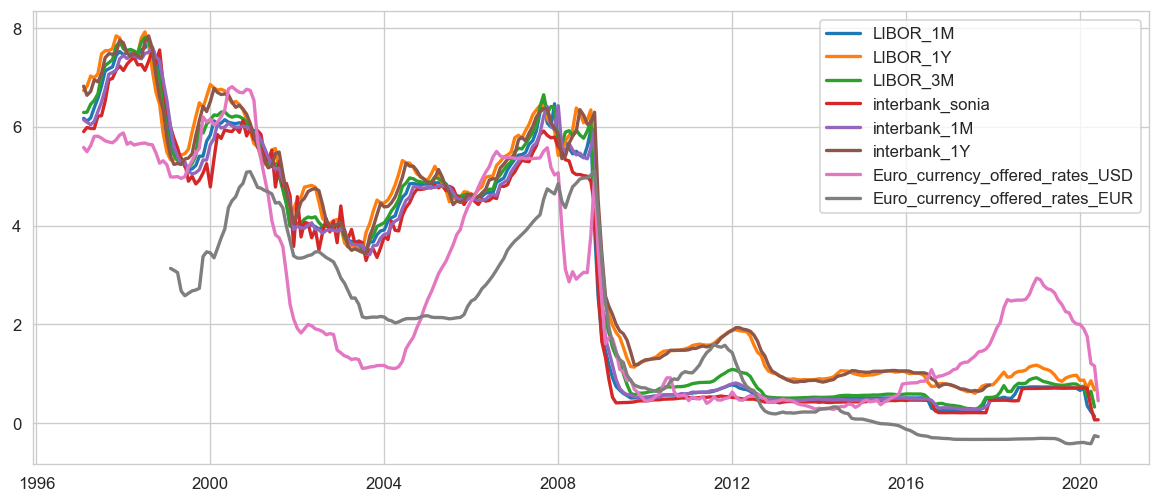

In [135]:
plt.figure(figsize=(12,5),dpi=120)
for i in range(len(items)):
    plt.plot(merged_dataset.index,merged_dataset.iloc[:,i].values,label = items[i],lw=2)
plt.legend()
plt.show()

### Pick a interested index to act as the benchmark for interest rate change

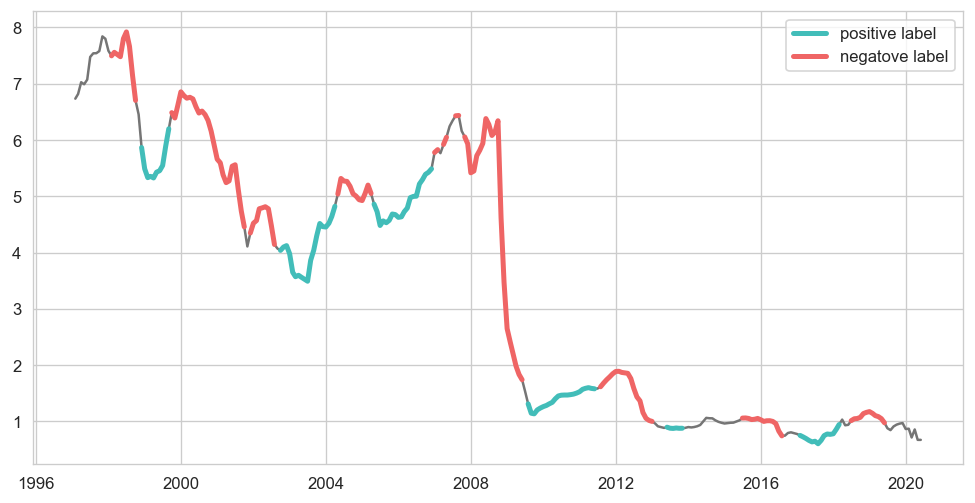

In [157]:

date_range = merged_dataset.index
list_of_value = merged_dataset.LIBOR_1Y.values
if list_of_value[-1] == np.nan:
    list_of_value[-1] = list_of_value[-2]
plot_positive = [np.nan for i in list_of_value]
plot_negative = [np.nan for i in list_of_value]

rate_change = [0 for i in list_of_value]
threshold = 0.1
for i in range(12,len(rate_change)-12):
    if list_of_value[i]-list_of_value[i+12]>threshold:
        rate_change[i] = -1
        plot_negative[i] = list_of_value[i]
    elif list_of_value[i]-list_of_value[i+12]<-threshold:
        rate_change[i] = 1
        plot_positive[i] = list_of_value[i]
plt.figure(figsize=(10,5),dpi=120)
plt.plot(date_range,list_of_value,color='#757575')
plt.plot(date_range,plot_positive,color='#42bdb9',lw=3,label='positive label')
plt.plot(date_range,plot_negative,color='#ef6565',lw=3,label='negatove label')
plt.legend()

In [169]:
label_df = pd.DataFrame(data={'label':rate_change},index = pd.DatetimeIndex(date_range))
minutes_timeseries = MPC_minutes.loc[:,['date','title','N_topics']]
minutes_timeseries = minutes_timeseries.set_index('date')
minutes_timeseries.index = pd.DatetimeIndex(minutes_timeseries.index)+pd.offsets.MonthBegin(0)
label_list = [label_df.loc[i,'label'] for i in minutes_timeseries.index]
minutes_timeseries.loc[:,'label'] = label_list
minutes_timeseries

,title,N_topics,label
date,,,
2020-06-01,Bank Rate maintained at 01% - May 2020_1st,"[[Growth and inflation projections, Authoritie...",0
2020-04-01,Bank Rate maintained at 01% - March 2020_1st,"[[Growth and inflation projections, The Bank o...",0
2020-04-01,Minutes of the special Monetary Policy Committ...,"[[Financial markets, Since the January MPC mee...",0
2020-02-01,Bank Rate maintained at 075% - January 2020_1st,"[[Growth and inflation projections, The Bank o...",0
2020-01-01,Bank Rate maintained at 075% - December 2019_1st,"[[Growth and inflation projections, The Bank o...",0
...,...,...,...
1997-12-01,Minutes of the MPC Meeting held on 8 and 9 Oct...,"[[Financial markets, There was little new info...",0
1997-11-01,Minutes of the MPC Meeting held on 10 and 11 S...,"[[Financial markets, The Committee turned its ...",0
1997-10-01,Minutes of the MPC Meeting held on 6 and 7 Aug...,"[[Growth and inflation projections, The sterli...",0


In [266]:
positve_rate_change = minutes_timeseries.loc[minutes_timeseries.loc[:,'label']==1,:]
negative_rate_change = minutes_timeseries.loc[minutes_timeseries.loc[:,'label']==-1,:]
neutral_rate_change = minutes_timeseries.loc[minutes_timeseries.loc[:,'label']==0,:]
print(len(positve_rate_change))
print(len(negative_rate_change))
print(len(neutral_rate_change))

89
119
53


**First look at postive change and coocurance**

In [250]:
topics =[
    'Financial markets',
    'The immediate policy decision',
    'Growth and inflation projections',
    'Money, credit, demand and output',
    'Supply, costs and prices',
    'The international economy',
    'All'
]

In [315]:
def create_word_frequency(positve_rate_change):

    all_corpus = {i:[] for i in topics}
    wordfreq = {i:{} for i in topics}

    for doc in positve_rate_change.N_topics:
        for para in doc:
            all_corpus[para[0]].append(preprocess_data(para[1:]))
            all_corpus['All'].append(preprocess_data(para[1:]))

    for i in topics:
        for corpus in all_corpus[i]:
            for sentence in corpus:
                for token in sentence:
                    if token not in wordfreq[i].keys():
                        wordfreq[i][token] = 1
                    else:
                        wordfreq[i][token] += 1
        wordfreq[i] = {k: v for k, v in sorted(wordfreq[i].items(), key=lambda item: -item[1])} # sorting
    return wordfreq


postive_word_freq = create_word_frequency(positve_rate_change)
negative_word_freq = create_word_frequency(negative_rate_change)
neutral_word_freq = create_word_frequency(neutral_rate_change)

In [261]:
# now the tfidf transformation
import math
for topic in topics:
    Num_n = sum(negative_word_freq[topic].values())
    Num_p = sum(postive_word_freq[topic].values())
    Num_ne = sum(neutral_word_freq[topic].values())
    
    word_count_df = pd.DataFrame(index = negative_word_freq[topic].keys(),data={'negative count':list(negative_word_freq[topic].values())
        }).join(
            pd.DataFrame(index=postive_word_freq[topic].keys(),data={'postive count':list(postive_word_freq[topic].values())}),
            how ='outer'
        ).join(
            pd.DataFrame(index=neutral_word_freq[topic].keys(),data={'neutral count':list(neutral_word_freq[topic].values())}),
            how ='outer'
        ).fillna(0)


    TFIDF_df = word_count_df.copy()
    TFIDF_df.loc[:,'negative count'] = TFIDF_df.loc[:,'negative count']/Num_n
    TFIDF_df.loc[:,'postive count'] = TFIDF_df.loc[:,'postive count']/Num_p
    TFIDF_df.loc[:,'neutral count'] = TFIDF_df.loc[:,'neutral count']/Num_ne

    idfDict = pd.DataFrame(index=word_count_df.index,data={'count':[0 for i in range(len(word_count_df))]})
    for doc in [negative_word_freq[topic], postive_word_freq[topic],neutral_word_freq[topic]]:
        for word, val in doc.items():
            if val > 0:
                idfDict.loc[word,'count'] += 1

    for word in idfDict.index:
        idfDict.loc[word,'count'] = math.log10(3 / float(idfDict.loc[word,'count']))

   
    word_count_df.loc[:,'negative count idf'] = TFIDF_df.loc[:,'negative count']*idfDict.loc[:,'count']
    word_count_df.loc[:,'postive count idf'] = TFIDF_df.loc[:,'postive count']*idfDict.loc[:,'count']

    multiplier = Num_p/Num_n  
    word_count_df.loc[:,'negative count'] = (word_count_df.loc[:,'negative count']*multiplier).round(0) 
    multiplier = Num_p/Num_ne
    word_count_df.loc[:,'neutral count'] = (word_count_df.loc[:,'neutral count']*multiplier).round(0) 
    
    word_count_df.loc[:,'p/n difference']    = word_count_df.loc[:,'postive count'] - word_count_df.loc[:,'negative count']
    word_count_df.loc[:,'p percentage']    = word_count_df.loc[:,'postive count'] / ( word_count_df.loc[:,'postive count']+word_count_df.loc[:,'negative count']+word_count_df.loc[:,'neutral count'])
    word_count_df.loc[:,'n percentage']    = word_count_df.loc[:,'negative count'] / ( word_count_df.loc[:,'postive count']+word_count_df.loc[:,'negative count']+word_count_df.loc[:,'neutral count'])
    word_count_df.to_csv('./Dictionary_based_method/tf_idf_data/{}.csv'.format(topic))

In [263]:
word_count_df.sort_values(by=['p percentage'], ascending=False)

,negative count,postive count,neutral count,negative count idf,postive count idf,p/n difference,p percentage,n percentage
paramount,0.0,1.0,0.0,0.000000,0.000003,1.0,1.0,0.0
synthet,0.0,1.0,0.0,0.000000,0.000003,1.0,1.0,0.0
propel,0.0,1.0,0.0,0.000000,0.000003,1.0,1.0,0.0
unionist,0.0,1.0,0.0,0.000000,0.000003,1.0,1.0,0.0
syria,0.0,1.0,0.0,0.000000,0.000003,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
recapitalis,9.0,0.0,0.0,0.000024,0.000000,-9.0,0.0,1.0
recalibr,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0
recalcul,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0
eba,0.0,0.0,3.0,0.000000,0.000000,0.0,0.0,0.0


Document Count

In [282]:
def create_doc_frequency(positve_rate_change):
    all_corpus = {i:[] for i in topics}
    wordfreq = {i:{} for i in topics}
    
    for doc in positve_rate_change.N_topics:
        document = []
        for para in doc:
            all_corpus[para[0]].append(preprocess_data(para[1:]))
            document += para[1:]
        all_corpus['All'].append(preprocess_data(document))

    for i in topics:
        for corpus in all_corpus[i]:
            seen_word = []
            for sentence in corpus:
                for token in sentence:
                    if token not in seen_word:
                        seen_word.append(token)
                        if token not in wordfreq[i].keys():
                            wordfreq[i][token] = 1
                        else:
                            wordfreq[i][token] += 1
   
    
    return wordfreq


postive_doc_freq = create_doc_frequency(positve_rate_change)
negative_doc_freq = create_doc_frequency(negative_rate_change)
neutral_doc_change = create_doc_frequency(neutral_rate_change)

In [284]:
for topic in topics:
    doc_count_df = pd.DataFrame(index = negative_doc_freq[topic].keys(),data={'negative count':list(negative_doc_freq[topic].values())
        }).join(
            pd.DataFrame(index=postive_doc_freq[topic].keys(),data={'postive count':list(postive_doc_freq[topic].values())}),
            how ='outer'
        ).join(
            pd.DataFrame(index=neutral_doc_change[topic].keys(),data={'neutral count':list(neutral_doc_change[topic].values())}),
            how ='outer'
        ).fillna(0)
    doc_count_df.loc[:,'p percentage']    = doc_count_df.loc[:,'postive count'] / ( doc_count_df.loc[:,'postive count']+doc_count_df.loc[:,'negative count']+doc_count_df.loc[:,'neutral count'])
    doc_count_df.loc[:,'n percentage']    = doc_count_df.loc[:,'negative count'] / ( doc_count_df.loc[:,'postive count']+doc_count_df.loc[:,'negative count']+doc_count_df.loc[:,'neutral count'])
    doc_count_df.loc[:,'p percentage no neutral']    = doc_count_df.loc[:,'postive count'] / ( doc_count_df.loc[:,'postive count']+doc_count_df.loc[:,'negative count'])
    doc_count_df.loc[:,'n percentage no neutral']    = doc_count_df.loc[:,'negative count'] / ( doc_count_df.loc[:,'postive count']+doc_count_df.loc[:,'negative count'])

    doc_count_df = doc_count_df.loc[(doc_count_df['negative count']+doc_count_df['postive count']+doc_count_df['neutral count'])>10,:]
    doc_count_df.to_csv('./Dictionary_based_method/doc_freq_data/{}.csv'.format(topic))
    #doc_count_df.sort_values(by=['p percentage'],ascending=False)

**Calibrate mcdonald dictionary and financial stability dictionary**

In [324]:
LM_dict = pd.read_excel('L&M dictioanry.xls').loc[:,['Entry','Positiv','Negativ','Econ@','ECON']]
LM_dict = LM_dict.dropna(subset = ['Econ@','ECON'])
LM_dict.loc[:,'sentiment'] = 'Neutral'
LM_dict.loc[LM_dict.loc[:,'Positiv']=='Positiv','sentiment'] = 'Postive'
LM_dict.loc[LM_dict.loc[:,'Negativ']=='Negativ','sentiment'] = 'Negative'
LM_dict.loc[:,'Entry'] =  [lemma.lemmatize(p_stemmer.stem(re.sub('#[0-9]', '',i))) for i in LM_dict.loc[:,'Entry'].apply(lambda x: x.lower()) if (i not in en_stop) and (i not in exclude)]       
LM_dict.drop_duplicates(subset ='Entry', keep = "first", inplace = True) 
print(LM_dict.head())
LM_dict = LM_dict.loc[:,['Entry','sentiment']]

          Entry  Positiv Negativ  Econ@  ECON sentiment
88      account      NaN     NaN  Econ@  ECON   Neutral
96        accru  Positiv     NaN  Econ@  ECON   Postive
277       agenc      NaN     NaN  Econ@  ECON   Neutral
302  agricultur      NaN     NaN  Econ@  ECON   Neutral
409    aluminum      NaN     NaN  Econ@  ECON   Neutral


In [326]:
LM_dict


,Entry,sentiment
88,account,Neutral
96,accru,Postive
277,agenc,Neutral
302,agricultur,Neutral
409,aluminum,Neutral
...,...,...
11673,worker,Neutral
11679,workshop,Neutral
11700,worth,Postive
11757,yield,Neutral


In [320]:
'bank' in postive_doc_freq['All'].keys()

True

In [341]:
multiplier = len(positve_rate_change)/len(negative_rate_change)
def find_frequency(word,dictionary,topic):
    if word in dictionary[topic].keys():
        return dictionary[topic][word]
    else:
        return 0
    
for topic in topics:
    topic_LM_dict = LM_dict.copy()
    topic_LM_dict.loc[:,'word_count_positive'] = topic_LM_dict.loc[:,'Entry'].apply(lambda x: find_frequency(x,postive_word_freq,topic))
    topic_LM_dict.loc[:,'word_count_negative'] = (topic_LM_dict.loc[:,'Entry'].apply(lambda x: find_frequency(x,negative_word_freq,topic))*multiplier).round(0)

    topic_LM_dict.loc[:,'doc_count_positive']  = topic_LM_dict.loc[:,'Entry'].apply(lambda x: find_frequency(x,postive_doc_freq,topic))
    topic_LM_dict.loc[:,'doc_count_negative']  = (topic_LM_dict.loc[:,'Entry'].apply(lambda x: find_frequency(x,negative_doc_freq,topic))*multiplier).round(0)
   
    topic_LM_dict.loc[:,'p percentage word']     = topic_LM_dict.loc[:,'word_count_positive'] / ( topic_LM_dict.loc[:,'word_count_positive']+topic_LM_dict.loc[:,'word_count_negative'])
    topic_LM_dict.loc[:,'n percentage word']     = topic_LM_dict.loc[:,'word_count_negative'] / ( topic_LM_dict.loc[:,'word_count_positive']+topic_LM_dict.loc[:,'word_count_negative'])
    topic_LM_dict.loc[:,'p percentage document'] = topic_LM_dict.loc[:,'doc_count_positive']  / ( topic_LM_dict.loc[:,'doc_count_positive'] +topic_LM_dict.loc[:,'doc_count_negative'])
    topic_LM_dict.loc[:,'n percentage document'] = topic_LM_dict.loc[:,'doc_count_negative']  / ( topic_LM_dict.loc[:,'doc_count_positive'] +topic_LM_dict.loc[:,'doc_count_negative'])

    topic_LM_dict = topic_LM_dict.loc[(topic_LM_dict['doc_count_positive']+topic_LM_dict['doc_count_negative'])>10,:]
    topic_LM_dict.to_csv('./Dictionary_based_method/LM_dictionary/{}.csv'.format(topic))
    #doc_count_df.sort_values(by=['p percentage'],ascending=False)

In [334]:
topic_LM_dict.loc[:,'word_count_positive'] / ( topic_LM_dict.loc[:,'word_count_positive'] + LM_dict.loc[:,'word_count_negative'] + LM_dict.loc[:,'word_count_neutral'])

88        44
96         0
277        5
302        0
409        0
        ... 
11673      1
11679      0
11700      0
11757    203
11786      0
Name: word_count_positive, Length: 243, dtype: int64

In [ ]:
LM_dict = pd.read_excel('Stability_dictionary.xlsx').loc[:,['Entry','Positiv','Negativ','Econ@','ECON']]
LM_dict = LM_dict.dropna(subset = ['Econ@','ECON'])
LM_dict.loc[:,'sentiment'] = 'Neutral'
LM_dict.loc[LM_dict.loc[:,'Positiv']=='Positiv','sentiment'] = 'Postive'
LM_dict.loc[LM_dict.loc[:,'Negativ']=='Negativ','sentiment'] = 'Negative'
LM_dict.loc[:,'Entry'] =  [lemma.lemmatize(p_stemmer.stem(re.sub('#[0-9]', '',i))) for i in LM_dict.loc[:,'Entry'].apply(lambda x: x.lower()) if (i not in en_stop) and (i not in exclude)]       
LM_dict.drop_duplicates(subset ='Entry', keep = "first", inplace = True) 
print(LM_dict.head())
LM_dict = LM_dict.loc[:,['Entry','sentiment']]

**Same algorithm for financial stability dictionary**

In [371]:
FS_dict = pd.read_excel('./Dictionary_based_method/Stability_dictionary.xlsx')
FS_dict.loc[FS_dict.loc[:,'Positive']==1,'sentiment'] = 'Positive'
FS_dict.loc[FS_dict.loc[:,'Negative']==1,'sentiment'] = 'Negative'
FS_dict.loc[:,'Entry'] =  [lemma.lemmatize(p_stemmer.stem(re.sub('#[0-9]', '',i))) for i in FS_dict.loc[:,'Word'].apply(lambda x: x.lower()) if (i not in en_stop) and (i not in exclude)]    
FS_dict = FS_dict.loc[:,['Entry','sentiment']]
FS_dict.drop_duplicates(subset ='Entry', keep = "first", inplace = True)
multiplier = len(positve_rate_change)/len(negative_rate_change)


for topic in topics:
    topic_FS_dict = FS_dict.copy()
    topic_FS_dict.loc[:,'word_count_positive'] = topic_FS_dict.loc[:,'Entry'].apply(lambda x: find_frequency(x,postive_word_freq,topic))
    topic_FS_dict.loc[:,'word_count_negative'] = (topic_FS_dict.loc[:,'Entry'].apply(lambda x: find_frequency(x,negative_word_freq,topic))*multiplier).round(0)

    topic_FS_dict.loc[:,'doc_count_positive']  = topic_FS_dict.loc[:,'Entry'].apply(lambda x: find_frequency(x,postive_doc_freq,topic))
    topic_FS_dict.loc[:,'doc_count_negative']  = (topic_FS_dict.loc[:,'Entry'].apply(lambda x: find_frequency(x,negative_doc_freq,topic))*multiplier).round(0)
   
    topic_FS_dict.loc[:,'p percentage word']     = topic_FS_dict.loc[:,'word_count_positive'] / ( topic_FS_dict.loc[:,'word_count_positive']+topic_FS_dict.loc[:,'word_count_negative'])
    topic_FS_dict.loc[:,'n percentage word']     = topic_FS_dict.loc[:,'word_count_negative'] / ( topic_FS_dict.loc[:,'word_count_positive']+topic_FS_dict.loc[:,'word_count_negative'])
    topic_FS_dict.loc[:,'p percentage document'] = topic_FS_dict.loc[:,'doc_count_positive']  / ( topic_FS_dict.loc[:,'doc_count_positive'] +topic_FS_dict.loc[:,'doc_count_negative'])
    topic_FS_dict.loc[:,'n percentage document'] = topic_FS_dict.loc[:,'doc_count_negative']  / ( topic_FS_dict.loc[:,'doc_count_positive'] +topic_FS_dict.loc[:,'doc_count_negative'])

    topic_FS_dict = topic_FS_dict.loc[(topic_FS_dict['doc_count_positive']+topic_FS_dict['doc_count_negative'])>10,:]
    topic_FS_dict.to_csv('./Dictionary_based_method/FS_dictionary/{}.csv'.format(topic))
    #doc_count_df.sort_values(by=['p percentage'],ascending=False)

**Have a look how sentiment looks with LM and FS dictionary**

In [411]:
def sentiment_calculator(dictionary,doc_list):
    document = ''
    for para in doc_list:      
        document += ' '.join(para[1:])
    tokens = tokenizer.tokenize(document.lower())
    stemmed_tokens = [lemma.lemmatize(p_stemmer.stem(i)) for i in tokens if (i not in en_stop) and (i not in exclude)]
    Positive_df = dictionary.loc[dictionary.loc[:,'sentiment']=='Positive',:].copy()
    Positive_df.loc[:,'Count'] = Positive_df.loc[:,'Entry'].apply(lambda x: stemmed_tokens.count(x))
    Negative_df = dictionary.loc[dictionary.loc[:,'sentiment']=='Negative',:].copy()
    Negative_df.loc[:,'Count'] = Negative_df.loc[:,'Entry'].apply(lambda x: stemmed_tokens.count(x))
    try:
        return (sum(Positive_df.Count)-sum(Negative_df.Count))/(sum(Positive_df.Count)+sum(Negative_df.Count))
    except:
        return np.nan


In [412]:
dictionary_sentiment = minutes_timeseries.copy()
dictionary_sentiment.loc[:,'FS_sentiment'] = dictionary_sentiment.loc[:,'N_topics'].apply(lambda x: sentiment_calculator(FS_dict,x))
dictionary_sentiment.loc[:,'LM_sentiment'] = dictionary_sentiment.loc[:,'N_topics'].apply(lambda x: sentiment_calculator(LM_dict,x))

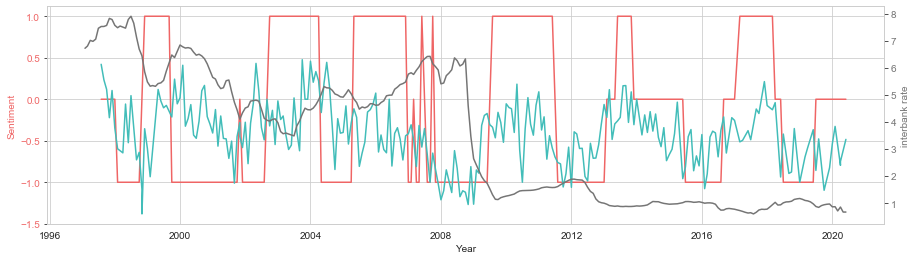

In [427]:
fig, ax1 = plt.subplots(figsize=(15,4))

ax1.set_xlabel('Year')
ax1.set_ylabel('Sentiment', color='#ef6565')
ax1.plot(dictionary_sentiment.index,dictionary_sentiment.label.values,color='#ef6565')
ax1.plot(dictionary_sentiment.index,dictionary_sentiment.FS_sentiment.values*2,color = '#42bdb9')
ax1.tick_params(axis='y', labelcolor='#ef6565')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)
ax2.set_ylabel('interbank rate', color='#757575')  # we already handled the x-label with ax1
ax2.plot(date_range,list_of_value,color='#757575')
ax2.tick_params(axis='y', labelcolor='#757575')


plt.show()